### a. KNN Classifier

In [8]:
import pandas as pd
import numpy as np
#import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
import matplotlib.pyplot as plt

### Step-1

In [9]:
dataset = pd.read_csv('./letter-recognition.csv')
dataset.head(5)

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [10]:
train_set = pd.DataFrame(data=None, columns = dataset.columns)
test_set = pd.DataFrame(data=None, columns = dataset.columns)
#train_set

### Step-2

In [11]:
def train_test_splitting(full_dataframe:pd.DataFrame, tgt_class:str):
    global train_set
    global test_set
    filtered_dataframe = full_dataframe[full_dataframe.letter==tgt_class]
    train, test = train_test_split(filtered_dataframe, test_size = 0.3)
    train_set = pd.concat([train_set,train], axis=0)
    test_set = pd.concat([test_set,test], axis=0)

In [12]:
dataset.letter.unique()

array(['T', 'I', 'D', 'N', 'G', 'S', 'B', 'A', 'J', 'M', 'X', 'O', 'R',
       'F', 'C', 'H', 'W', 'L', 'P', 'E', 'V', 'Y', 'Q', 'U', 'K', 'Z'],
      dtype=object)

### Step-3

In [13]:
for tgt_class in dataset.letter.unique():
    #print("target class is:",tgt_class)
    train_test_splitting(dataset, tgt_class)

In [14]:
train_set.letter.unique()

array(['T', 'I', 'D', 'N', 'G', 'S', 'B', 'A', 'J', 'M', 'X', 'O', 'R',
       'F', 'C', 'H', 'W', 'L', 'P', 'E', 'V', 'Y', 'Q', 'U', 'K', 'Z'],
      dtype=object)

In [15]:
test_set.letter.unique()

array(['T', 'I', 'D', 'N', 'G', 'S', 'B', 'A', 'J', 'M', 'X', 'O', 'R',
       'F', 'C', 'H', 'W', 'L', 'P', 'E', 'V', 'Y', 'Q', 'U', 'K', 'Z'],
      dtype=object)

In [16]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

### Step-4

In [17]:
X_train = train_set.drop(['letter'], axis=1)
y_train = train_set['letter']
X_test = test_set.drop(['letter'], axis=1)
y_test = test_set['letter']

In [18]:
type(X_train), type(X_test), type(y_train), type(y_test)

(pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.series.Series,
 pandas.core.series.Series)

In [19]:
k_value = []
knn_train_accuracy = []
knn_test_accuracy = []
def knn_classifier(k_val):
    #knn_value = k_val
    knn_classifier = KNeighborsClassifier(n_neighbors = k_val, metric = 'euclidean')
    knn_classifier.fit(X_train, y_train)
    
    #compute train accuracy
    y_pred_train = knn_classifier.predict(X_train)
    #train_accuracy = accuracy_score(y_train, y_pred_train)
    knn_train_accuracy.append(accuracy_score(y_train, y_pred_train))
    
    #compute test accuracy
    y_pred_test = knn_classifier.predict(X_test)
    #test_accuracy = accuracy_score(y_test, y_pred_test)
    knn_test_accuracy.append(accuracy_score(y_test, y_pred_test))
    
    k_value.append(k_val)
    
    
    #return(sigma, train_accuracy,test_accuracy)
    

In [20]:
for k in np.arange(1,16):
    knn_classifier(k)

In [21]:
print (k_value,knn_train_accuracy,knn_test_accuracy)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15] [1.0, 0.9749088569590393, 0.9798413038816213, 0.9731217385088283, 0.9727643148187862, 0.968618200014297, 0.9682607763242548, 0.9646150546858245, 0.9638287225677318, 0.9596111230252341, 0.9584673672170991, 0.9566087640288798, 0.9541067981985846, 0.9511759239402388, 0.9501036528701122] [0.9532523706538014, 0.9356180336050574, 0.9460988188321411, 0.946930627183497, 0.9485942438862086, 0.9449342871402429, 0.9460988188321411, 0.9442688404591583, 0.9416070537348195, 0.9414406920645483, 0.9399434370321078, 0.9371152886374979, 0.9359507569455997, 0.9337880552320745, 0.9317917151888205]


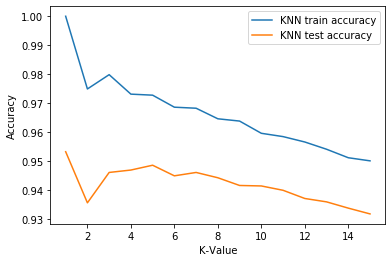

In [22]:
plt.plot(k_value, knn_train_accuracy, label = "KNN train accuracy")
plt.plot(k_value, knn_test_accuracy, label = "KNN test accuracy")
plt.xlabel('K-Value')
plt.ylabel('Accuracy')
plt.legend()

### Looking at the above graph, 'Sweet Spot' for KNN Classifier is at K = 3

### b. Parzen Window Classifier

In [23]:
def compute_sigma(distances):
    #print("sigma is:", sigma)
    distance_sq = np.square(distances)
    parzen_sigma = 1/(sigma*np.sqrt(2*np.pi))*np.exp(-distance_sq/(2*np.square(sigma)))
    return parzen_sigma 

In [24]:
#testing
sigma = 3
compute_sigma([1,5,8,13])

array([1.25794409e-01, 3.31590463e-02, 3.79866201e-03, 1.11236208e-05])

In [25]:
sigma_value = []
parzen_train_accuracy = []
parzen_test_accuracy = []
#sigma=1
def parzen_classifier(sigma_val):
    #sigma = sigma_val
    knn_classifier = KNeighborsClassifier(n_neighbors = 3, weights = compute_sigma)
    knn_classifier.fit(X_train, y_train)
    
    #compute train accuracy
    y_pred_train = knn_classifier.predict(X_train)
    #train_accuracy = accuracy_score(y_train, y_pred_train)
    parzen_train_accuracy.append(accuracy_score(y_train, y_pred_train))
    
    #compute test accuracy
    y_pred_test = knn_classifier.predict(X_test)
    #test_accuracy = accuracy_score(y_test, y_pred_test)
    parzen_test_accuracy.append(accuracy_score(y_test, y_pred_test))
    
    sigma_value.append(sigma_val)
    
    
    #return(sigma, train_accuracy,test_accuracy)

In [26]:
for sigma in np.arange(1,11):
    parzen_classifier(sigma)
    
# sigma will act as a global variable for function compute_sigma

In [27]:
print (sigma_value,parzen_train_accuracy,parzen_test_accuracy)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10] [1.0, 0.9969261562656373, 0.9879190792765744, 0.9852741439702624, 0.985059689756237, 0.985059689756237, 0.985059689756237, 0.985059689756237, 0.985059689756237, 0.985059689756237] [0.9572450507403094, 0.9542505406754284, 0.9525869239727167, 0.9525869239727167, 0.9525869239727167, 0.9525869239727167, 0.9525869239727167, 0.9525869239727167, 0.9525869239727167, 0.9525869239727167]


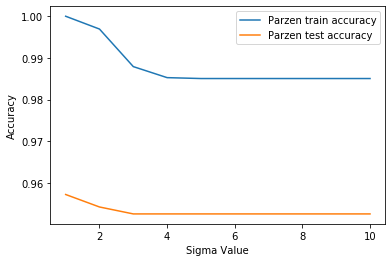

In [28]:
plt.plot(sigma_value, parzen_train_accuracy, label = "Parzen train accuracy")
plt.plot(sigma_value, parzen_test_accuracy, label = "Parzen test accuracy")
plt.xlabel('Sigma Value')
plt.ylabel('Accuracy')
plt.legend()

### Looking at the above graph, 'Sweet Spot' for Parzen Classifier is at sigma = 2